In [1]:
#update scikit-learn
!pip uninstall scikit-learn -y
!pip install scikit-learn
!pip install scikit-multilearn
!pip install iterative-stratification
!pip install sklearn-contrib-lightning
!pip install --upgrade numpy

Found existing installation: scikit-learn 1.0.1
Uninstalling scikit-learn-1.0.1:
  Successfully uninstalled scikit-learn-1.0.1
     |████████████████████████████████| 23.2 MB 1.6 MB/s 
     |████████████████████████████████| 89 kB 8.3 MB/s 
     |████████████████████████████████| 3.4 MB 34.2 MB/s 
     |████████████████████████████████| 15.7 MB 31.2 MB/s 
  Attempting uninstall: numpy
    Found existing installation: numpy 1.19.5
    Uninstalling numpy-1.19.5:
      Successfully uninstalled numpy-1.19.5
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
yellowbrick 1.3.post1 requires numpy<1.20,>=1.16.0, but you have numpy 1.21.4 which is incompatible.
datascience 0.10.6 requires folium==0.2.1, but you have folium 0.8.3 which is incompatible.
albumentations 0.1.12 requires imgaug<0.2.7,>=0.2.5, but you have imgaug 0.2.9 which is incompatible.


In [2]:
# Load Data
import pandas as pd
import warnings
warnings.filterwarnings("ignore")

In [39]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

url = 'https://raw.githubusercontent.com/nasa-petal/search-engine/main/golden.json'
df = pd.read_json(url, orient='columns')
df.head()

,paper,mag,venue_mag,author,reference,title,abstract,petalID,doi,venue,level1,level2,level3,url,isBiomimicry,fullDocLink,isOpenAccess,abstract_full,title_full
0,2103410568,"['bubble nest', 'nest', 'mixing', 'bubble', 'p...",['Biology Letters'],"[2346835213, 2098042950]","[2130285640, 2066345165, 2054319467, 204771406...","['building', 'home', 'foam', 'tungara', 'frog'...","['frogs', 'build', 'foam', 'nests', 'floating'...",0,10.1098/RSBL.2009.0934,"[""Weird Nature: An Astonishing Exploration of ...","['physically_assemble/disassemble', 'protect_f...","['physically_assemble_structure', 'protect_fro...","['protect_from_animals', 'protect_from_loss_of...",https://royalsocietypublishing.org/doi/10.1098...,Y,https://royalsocietypublishing.org/doi/10.1098...,True,Frogs that build foam nests floating on water ...,Building a home from foam—túngara frog foam ne...
1,2138292607,"['sunset', 'earth s magnetic field', 'compass'...",['Proceedings of the National Academy of Scien...,"[2132083079, 2425702268, 2552946098]","[1493129647, 2037761037, 1984592609, 213699427...","['nocturnal', 'mammal', 'greater', 'mouse', 'e...","['evidence', 'suggests', 'bats', 'detect', 'ge...",1,10.1073/PNAS.0912477107,['Proceedings of the National Academy of Scien...,['sense_send_or_process_information'],['sense_signals/environmental_cues'],['sense_spatial_awareness/balance/orientation'],https://www.pnas.org/content/107/15/6941,Y,https://www.pnas.org/content/107/15/6941.full.pdf,True,Recent evidence suggests that bats can detect ...,"A nocturnal mammal, the greater mouse-eared ba..."
2,2005539166,"['sepia mestus', 'optomotor response', 'cuttle...",['The Journal of Experimental Biology'],"[2163942483, 3088803717]","[2035108601, 2155571491, 2159857711, 207521876...","['polarization', 'sensitivity', 'two', 'specie...","['existence', 'polarization', 'sensitivity', '...",2,10.1242/JEB.042937,"['The Journal of Experimental Biology', 'Curre...",['sense_send_or_process_information'],['sense_signals/environmental_cues'],"['sense_light_in_the_non-visible_spectrum', 's...",https://jeb.biologists.org/content/213/19/3364,Y,https://journals.biologists.com/jeb/article-pd...,True,SUMMARY The existence of polarization sensitiv...,Polarization sensitivity in two species of cut...
3,2151557512,"['energy source', 'cellulase', 'archaea', 'cel...",['Nature Communications'],"[3146712807, 3146712807, 2189911855, 265906908...","[2141885858, 2120772351, 2108929776, 212024499...","['identification', 'characterization', 'multid...","['archaea', 'microorganisms', 'wide', 'range',...",3,10.1038/NCOMMS1373,['Nature Communications'],"['chemically_modify_or_change_energy_state', '...","['chemically_break_down', 'protect_from_non-li...","['chemically_break_down_organic_compounds', 'p...",https://www.nature.com/articles/ncomms1373,Y,https://www.nature.com/articles/ncomms1373.pdf,True,Despite extensive studies on microbial and enz...,Identification and characterization of a multi...
4,2160542693,"['galactan', 'coralline algae', 'cell wall', '...",['Journal of Phycology'],"[1790079306, 2557664461, 189902495, 2140516860]","[2001396309, 2057007315, 1968834637, 212515227...","['differences', 'polysaccharide', 'structure',...","['articulated', 'coralline', 'calliarthron', '...",4,10.1111/J.1529-8817.2010.00828.X,"['The Journal of Experimental Biology', 'Natur...",['maintain_structural_integrity'],['manage_structural_forces'],"['manage_shear', 'manage_stress/strain']",https://onlinelibrary.wiley.com/doi/abs/10.111...,Y,,False,The articulated coralline Calliarthron cheilos...,DIFFERENCES IN POLYSACCHARIDE STRUCTURE BETWEE...


In [40]:
# Drop all non-feature columns
non_feat = ['paper', 'title', 'abstract', 'petalID', 'doi', 'level2', 'level3', 'url', 'isBiomimicry', 'fullDocLink', 'isOpenAccess']
df.drop(non_feat, axis=1, inplace=True)
df.head()

,mag,venue_mag,author,reference,venue,level1,abstract_full,title_full
0,"['bubble nest', 'nest', 'mixing', 'bubble', 'p...",['Biology Letters'],"[2346835213, 2098042950]","[2130285640, 2066345165, 2054319467, 204771406...","[""Weird Nature: An Astonishing Exploration of ...","['physically_assemble/disassemble', 'protect_f...",Frogs that build foam nests floating on water ...,Building a home from foam—túngara frog foam ne...
1,"['sunset', 'earth s magnetic field', 'compass'...",['Proceedings of the National Academy of Scien...,"[2132083079, 2425702268, 2552946098]","[1493129647, 2037761037, 1984592609, 213699427...",['Proceedings of the National Academy of Scien...,['sense_send_or_process_information'],Recent evidence suggests that bats can detect ...,"A nocturnal mammal, the greater mouse-eared ba..."
2,"['sepia mestus', 'optomotor response', 'cuttle...",['The Journal of Experimental Biology'],"[2163942483, 3088803717]","[2035108601, 2155571491, 2159857711, 207521876...","['The Journal of Experimental Biology', 'Curre...",['sense_send_or_process_information'],SUMMARY The existence of polarization sensitiv...,Polarization sensitivity in two species of cut...
3,"['energy source', 'cellulase', 'archaea', 'cel...",['Nature Communications'],"[3146712807, 3146712807, 2189911855, 265906908...","[2141885858, 2120772351, 2108929776, 212024499...",['Nature Communications'],"['chemically_modify_or_change_energy_state', '...",Despite extensive studies on microbial and enz...,Identification and characterization of a multi...
4,"['galactan', 'coralline algae', 'cell wall', '...",['Journal of Phycology'],"[1790079306, 2557664461, 189902495, 2140516860]","[2001396309, 2057007315, 1968834637, 212515227...","['The Journal of Experimental Biology', 'Natur...",['maintain_structural_integrity'],The articulated coralline Calliarthron cheilos...,DIFFERENCES IN POLYSACCHARIDE STRUCTURE BETWEE...


In [5]:
# Preliminary exploration
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11084 entries, 0 to 11083
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   mag            11084 non-null  object
 1   venue_mag      11084 non-null  object
 2   author         11084 non-null  object
 3   reference      11084 non-null  object
 4   venue          11084 non-null  object
 5   level1         11084 non-null  object
 6   abstract_full  11065 non-null  object
 7   title_full     11084 non-null  object
dtypes: object(8)
memory usage: 692.9+ KB


In [ ]:
print(df[df['title_full'] != ''].shape)
print(df[df['title_full'] != '[]'].shape)
print(df[df['title_full'] != "['']"].shape)

print(df[df['mag'] != ''].shape)
print(df[df['mag'] != '[]'].shape)
print(df[df['mag'] != "['']"].shape)

print(df[df['venue_mag'] != ''].shape)
print(df[df['venue_mag'] != '[]'].shape)
print(df[df['venue_mag'] != "['']"].shape)

print(df[df['author'] != ''].shape)
print(df[df['author'] != '[]'].shape)
print(df[df['author'] != "['']"].shape)

print(df[df['reference'] != ''].shape)
print(df[df['reference'] != '[]'].shape)
print(df[df['reference'] != "['']"].shape)

print(df[df['venue'] != ''].shape)
print(df[df['venue'] != '[]'].shape)
print(df[df['venue'] != "['']"].shape)

print(df[df['level1'] != ''].shape)
print(df[df['level1'] != '[]'].shape)
print(df[df['level1'] != "['']"].shape)

(11013, 8)
(11084, 8)
(11084, 8)
(11084, 8)
(1432, 8)
(11084, 8)
(11084, 8)
(1429, 8)
(11084, 8)
(11084, 8)
(1432, 8)
(11084, 8)
(11084, 8)
(1369, 8)
(11084, 8)
(11084, 8)
(10725, 8)
(11084, 8)
(11084, 8)
(1132, 8)
(11084, 8)


In [41]:
# Clean data

# remove rows with no level1 labels, or no titles
df = df[df['title_full'] != '']
df = df[df['level1'] != '[]']

# remap level1 labels
df.level1.replace({'physically_assemble/disassemble':'physically_assemble_or_disassemble',
                    'sense,_send,_or_process_information':'sense_send_or_process_information',
                    'maintain_ecological_community':'sustain_ecological_community',
                    'manipulate_solids,_liquids,_gases,_or_energy':'manipulate_solids_liquids_gases_or_energy'}, regex=True, inplace=True)
'''
# turn labels into integers and store in level1_num
df['level1_num'] = df['level1']

label_to_num = {'physically_assemble_or_disassemble': '1',
                'protect_from_harm': '2',
                'sense_send_or_process_information': '3',
                'chemically_modify_or_change_energy_state': '4',
                'maintain_structural_integrity': '5',
                'attach': '6',
                'move': '7',
                'process_resources': '8',
                'sustain_ecological_community': '9',
                'change_size_or_color': '10',
                'manipulate_solids_liquids_gases_or_energy': '11'}

df.level1_num.replace(label_to_num, regex=True, inplace=True)

# convert integer strings to ints
df.level1_num.replace({"'": '', '"': ''}, regex=True, inplace=True)

# store papers with no level 1 labels (ie non-biomimicry papers) as class 0.
df['level1_num'] = df['level1_num'].str.replace(r"\[\]","[0]")
'''
# convert array strings to actual arrays
from ast import literal_eval
df['level1'] = df['level1'].apply(literal_eval)
#df['level1_num'] = df['level1_num'].apply(literal_eval)
df.head()

,mag,venue_mag,author,reference,venue,level1,abstract_full,title_full
0,"['bubble nest', 'nest', 'mixing', 'bubble', 'p...",['Biology Letters'],"[2346835213, 2098042950]","[2130285640, 2066345165, 2054319467, 204771406...","[""Weird Nature: An Astonishing Exploration of ...","[physically_assemble_or_disassemble, protect_f...",Frogs that build foam nests floating on water ...,Building a home from foam—túngara frog foam ne...
1,"['sunset', 'earth s magnetic field', 'compass'...",['Proceedings of the National Academy of Scien...,"[2132083079, 2425702268, 2552946098]","[1493129647, 2037761037, 1984592609, 213699427...",['Proceedings of the National Academy of Scien...,[sense_send_or_process_information],Recent evidence suggests that bats can detect ...,"A nocturnal mammal, the greater mouse-eared ba..."
2,"['sepia mestus', 'optomotor response', 'cuttle...",['The Journal of Experimental Biology'],"[2163942483, 3088803717]","[2035108601, 2155571491, 2159857711, 207521876...","['The Journal of Experimental Biology', 'Curre...",[sense_send_or_process_information],SUMMARY The existence of polarization sensitiv...,Polarization sensitivity in two species of cut...
3,"['energy source', 'cellulase', 'archaea', 'cel...",['Nature Communications'],"[3146712807, 3146712807, 2189911855, 265906908...","[2141885858, 2120772351, 2108929776, 212024499...",['Nature Communications'],"[chemically_modify_or_change_energy_state, pro...",Despite extensive studies on microbial and enz...,Identification and characterization of a multi...
4,"['galactan', 'coralline algae', 'cell wall', '...",['Journal of Phycology'],"[1790079306, 2557664461, 189902495, 2140516860]","[2001396309, 2057007315, 1968834637, 212515227...","['The Journal of Experimental Biology', 'Natur...",[maintain_structural_integrity],The articulated coralline Calliarthron cheilos...,DIFFERENCES IN POLYSACCHARIDE STRUCTURE BETWEE...


In [42]:
# create our ground truth matrix D x T where row indexes are the paper MAGIDS, and the columns are the topics. A 1 means the paper had the label in the ground truth data, a 0 means it didn't. 
from IPython.core.debugger import set_trace
labels = ['physically_assemble_or_disassemble',
          'protect_from_harm',
          'sense_send_or_process_information',
          'chemically_modify_or_change_energy_state',
          'maintain_structural_integrity',
          'attach',
          'move',
          'process_resources',
          'sustain_ecological_community',
          'change_size_or_color']

for label in labels:
  df[label] = 0

y_true = []

for idx, sequence in df.iterrows():
  row = []
  for label in labels:
    if (label in sequence['level1']):
      df.at[idx,label] = 1
      row.append(1)
    else:
      row.append(0)
  y_true.append(row)

# add a column to our dataframe to hold our ground truth labels.
df['y'] = y_true
df.head()

,mag,venue_mag,author,reference,venue,level1,abstract_full,title_full,physically_assemble_or_disassemble,protect_from_harm,sense_send_or_process_information,chemically_modify_or_change_energy_state,maintain_structural_integrity,attach,move,process_resources,sustain_ecological_community,change_size_or_color,y
0,"['bubble nest', 'nest', 'mixing', 'bubble', 'p...",['Biology Letters'],"[2346835213, 2098042950]","[2130285640, 2066345165, 2054319467, 204771406...","[""Weird Nature: An Astonishing Exploration of ...","[physically_assemble_or_disassemble, protect_f...",Frogs that build foam nests floating on water ...,Building a home from foam—túngara frog foam ne...,1,1,0,0,0,0,0,0,0,0,"[1, 1, 0, 0, 0, 0, 0, 0, 0, 0]"
1,"['sunset', 'earth s magnetic field', 'compass'...",['Proceedings of the National Academy of Scien...,"[2132083079, 2425702268, 2552946098]","[1493129647, 2037761037, 1984592609, 213699427...",['Proceedings of the National Academy of Scien...,[sense_send_or_process_information],Recent evidence suggests that bats can detect ...,"A nocturnal mammal, the greater mouse-eared ba...",0,0,1,0,0,0,0,0,0,0,"[0, 0, 1, 0, 0, 0, 0, 0, 0, 0]"
2,"['sepia mestus', 'optomotor response', 'cuttle...",['The Journal of Experimental Biology'],"[2163942483, 3088803717]","[2035108601, 2155571491, 2159857711, 207521876...","['The Journal of Experimental Biology', 'Curre...",[sense_send_or_process_information],SUMMARY The existence of polarization sensitiv...,Polarization sensitivity in two species of cut...,0,0,1,0,0,0,0,0,0,0,"[0, 0, 1, 0, 0, 0, 0, 0, 0, 0]"
3,"['energy source', 'cellulase', 'archaea', 'cel...",['Nature Communications'],"[3146712807, 3146712807, 2189911855, 265906908...","[2141885858, 2120772351, 2108929776, 212024499...",['Nature Communications'],"[chemically_modify_or_change_energy_state, pro...",Despite extensive studies on microbial and enz...,Identification and characterization of a multi...,0,1,0,1,0,0,0,0,0,0,"[0, 1, 0, 1, 0, 0, 0, 0, 0, 0]"
4,"['galactan', 'coralline algae', 'cell wall', '...",['Journal of Phycology'],"[1790079306, 2557664461, 189902495, 2140516860]","[2001396309, 2057007315, 1968834637, 212515227...","['The Journal of Experimental Biology', 'Natur...",[maintain_structural_integrity],The articulated coralline Calliarthron cheilos...,DIFFERENCES IN POLYSACCHARIDE STRUCTURE BETWEE...,0,0,0,0,1,0,0,0,0,0,"[0, 0, 0, 0, 1, 0, 0, 0, 0, 0]"


In [43]:
# combine title and abstract

from text_unidecode import unidecode
import re

ACCEPTABLE_CHARS = re.compile(r"[^a-zA-Z\s]+")

def normalize_text(text):
    if text is None or len(text) == 0:
        return ""

    norm_text = unidecode(text).lower()
    norm_text = ACCEPTABLE_CHARS.sub(" ", norm_text)
    norm_text = re.sub(r"\s+", " ", norm_text).strip()

    return norm_text

def concat_text(row, sep="|", sep_num=5):
    title = row.title_full
    abstract = row.abstract_full

    title = normalize_text(title)
    abstract = normalize_text(abstract)
    
    return f"{title} {sep * sep_num} {abstract}"

def concat_text_raw(row, sep=". ", sep_num=1):
    title = row.title_full
    abstract = row.abstract_full
    
    return f"{title}{sep * sep_num}{abstract}"

df.loc[:, "text"] = df.apply(concat_text, axis=1)
df.loc[:, "text_raw"] = df.apply(concat_text_raw, axis=1)

In [44]:
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from wordcloud import WordCloud, STOPWORDS
from collections import Counter
warnings.filterwarnings("ignore")

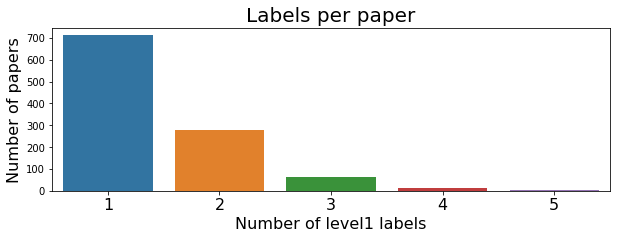

In [45]:
# Number of labels per paper
# https://colab.research.google.com/github/GokuMohandas/MLOps/blob/main/notebooks/tagifai.ipynb#scrollTo=NgMGuIQrNkSV

labels = tuple(labels)
num_tags_per_project = [len(labels) for labels in df.level1]
num_tags, num_projects = zip(*Counter(num_tags_per_project).items())
plt.figure(figsize=(10, 3))
ax = sns.barplot(list(num_tags), list(num_projects))
plt.title("Labels per paper", fontsize=20)
plt.xlabel("Number of level1 labels", fontsize=16)
ax.set_xticklabels(range(1, len(num_tags)+1), rotation=0, fontsize=16)
plt.ylabel("Number of papers", fontsize=16)
plt.show()

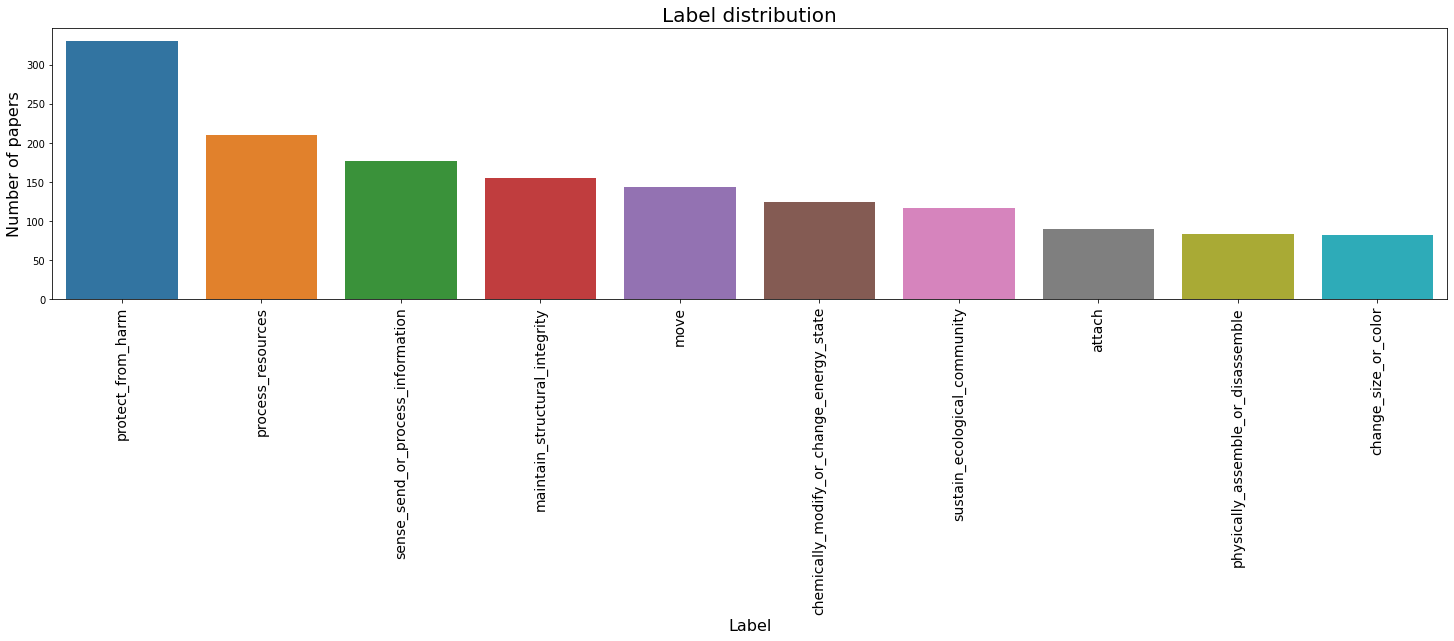

In [46]:
# Distribution of labels
# https://colab.research.google.com/github/GokuMohandas/MLOps/blob/main/notebooks/tagifai.ipynb#scrollTo=NgMGuIQrNkSV

import itertools

all_tags = list(itertools.chain.from_iterable(df.level1.values))
tags, tag_counts = zip(*Counter(all_tags).most_common())
plt.figure(figsize=(25, 5))
ax = sns.barplot(list(tags), list(tag_counts))
plt.title("Label distribution", fontsize=20)
plt.xlabel("Label", fontsize=16)
ax.set_xticklabels(tags, rotation=90, fontsize=14)
plt.ylabel("Number of papers", fontsize=16)
plt.show()

In [48]:
# Drop all non-feature columns
non_feat = ['mag', 'venue_mag', 'author', 'reference', 'venue', 'level1', 'abstract_full', 'title_full']
df.drop(non_feat, axis=1, inplace=True)
df.head()

KeyError: ignored

In [38]:
from google.colab import drive
drive.mount('/content/gdrive')

data_prefix = '/content/gdrive/My Drive/petal-search-engine/data/'

Mounted at /content/gdrive


In [50]:
# Write out the cleaned data
df.to_csv(data_prefix + 'cleaned.csv', index=False)

In [ ]:
# Create train, test, val splits

# Read in the cleaned data
df = pd.read_csv(data_prefix + 'cleaned.csv')

# convert array strings to actual arrays
from ast import literal_eval
df['y'] = df['y'].apply(literal_eval)
df.head()

,y,text
0,"[1, 1, 0, 0, 0, 0, 0, 0, 0, 0]",building a home from foam tungara frog foam ne...
1,"[0, 0, 1, 0, 0, 0, 0, 0, 0, 0]",a nocturnal mammal the greater mouse eared bat...
2,"[0, 0, 1, 0, 0, 0, 0, 0, 0, 0]",polarization sensitivity in two species of cut...
3,"[0, 1, 0, 1, 0, 0, 0, 0, 0, 0]",identification and characterization of a multi...
4,"[0, 0, 0, 0, 1, 0, 0, 0, 0, 0]",differences in polysaccharide structure betwee...


In [ ]:
from sklearn.model_selection import train_test_split

features = df.drop('y', axis=1)
labels = df['y']

X_train, X_test, y_train, y_test = train_test_split(features, labels, test_size=0.4, random_state=42)
X_test, X_val, y_test, y_val = train_test_split(X_test, y_test, test_size=0.5, random_state=42)

In [ ]:
for dataset in [y_train, y_val, y_test]:
    print(round(len(dataset) / len(labels), 2))

0.6
0.2
0.2


In [ ]:
# Write out data

X_train.to_csv(data_prefix + 'train_features.csv', index=False)
X_val.to_csv(data_prefix + 'val_features.csv', index=False)
X_test.to_csv(data_prefix + 'test_features.csv', index=False)

y_train.to_csv(data_prefix + 'train_labels.csv', index=False)
y_val.to_csv(data_prefix + 'val_labels.csv', index=False)
y_test.to_csv(data_prefix + 'test_labels.csv', index=False)